In [26]:
library(tidyverse)
library(gtools)
library(tibble)
library(dplyr)
library(psy)
library(nFactors)

Now I am going to get cronbach's alpha for items

In [27]:
getwd()

[1] "C:/Users/Sam Cannon/Desktop/Python/SIOP 2020"

In [28]:
data_1 <- read.csv("factor_analysis_data.csv", header = T)
df <- read.csv("composite_df.csv", header = TRUE)

Learning Alpha

In [30]:
cronbach(data_1[, 2:11])

$sample.size
[1] 295

$number.of.items
[1] 10

$alpha
[1] 0.9180813

Belonging and Authenticity Alpha

In [18]:
cronbach(data_1[, 12:27])

$sample.size
[1] 295

$number.of.items
[1] 16

$alpha
[1] 0.9758603

Turnover Alpha

In [22]:
cronbach(data_1[, 28:30])

$sample.size
[1] 295

$number.of.items
[1] 3

$alpha
[1] 0.911591

Factor Analysis with 3 Factors

Maximum Likelihood Factor Analysis
entering raw data and extracting 3 factors,
with varimax rotation

In [27]:
data <- data_1[, 2:30]

In [31]:
head(data_1)

X,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,...,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3
0,2,1,2,2,2,2,2,1,6,...,4,4,4,3,3,3,3,1,1,1
1,3,2,2,3,3,3,3,3,2,...,1,1,1,2,2,1,1,5,5,5
2,4,4,4,4,4,4,4,4,5,...,4,4,4,4,4,4,4,1,3,2
3,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,2,2,2
4,3,3,3,3,3,3,3,3,6,...,4,4,4,4,4,4,4,2,2,2
5,3,3,3,3,3,3,3,3,6,...,4,4,4,4,4,4,4,4,4,4


In [34]:
factor_df = data_1[, 1:11]

## How many factors should we have?
- use a scree plot to determine

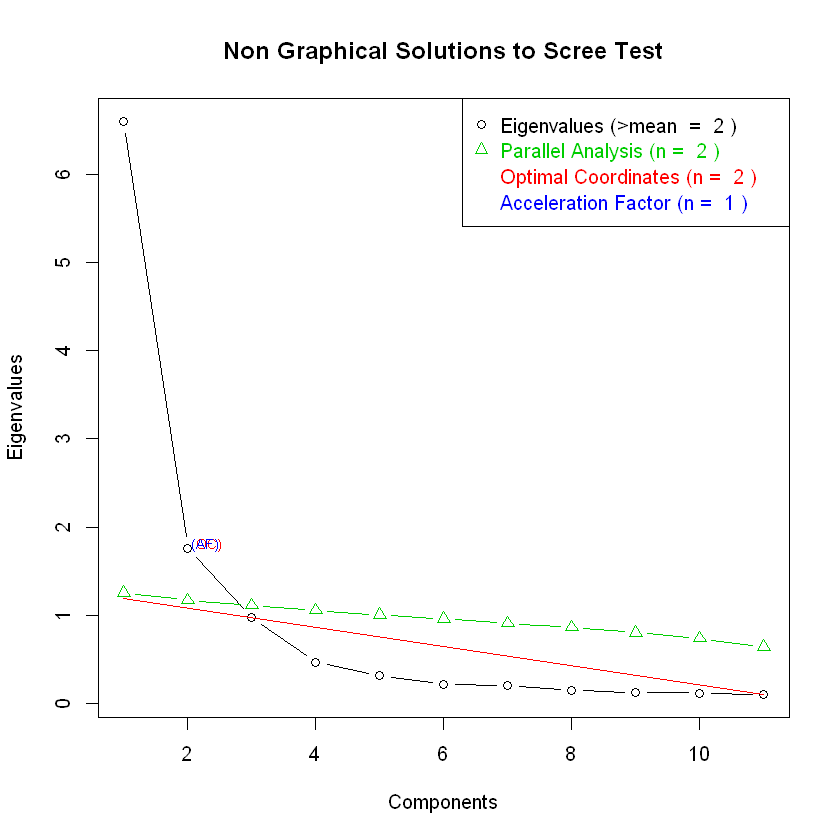

In [38]:
ev <- eigen(cor(factor_df)) # get eigenvalues
ap <- parallel(subject=nrow(factor_df),var=ncol(factor_df),
  rep=100,cent=.05)
nS <- nScree(x=ev$values, aparallel=ap$eigen$qevpea)
plotnScree(nS)

## Use 2 factors, as suggested by the scree plot


Call:
factanal(x = factor_df, factors = 2)

Uniquenesses:
         X Learning_1 Learning_2 Learning_3 Learning_4 Learning_5 Learning_6 
      0.98       0.29       0.20       0.19       0.23       0.26       0.18 
Learning_7 Learning_8    Learn_1    Learn_2 
      0.19       0.24       0.16       0.06 

Loadings:
           Factor1 Factor2
Learning_1  0.84          
Learning_2  0.89          
Learning_3  0.90          
Learning_4  0.87          
Learning_5  0.85          
Learning_6  0.91          
Learning_7  0.90          
Learning_8  0.87          
Learn_1             0.89  
Learn_2             0.96  
X                         

               Factor1 Factor2
SS loadings       6.22    1.79
Proportion Var    0.57    0.16
Cumulative Var    0.57    0.73

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 246.41 on 34 degrees of freedom.
The p-value is 4.81e-34 


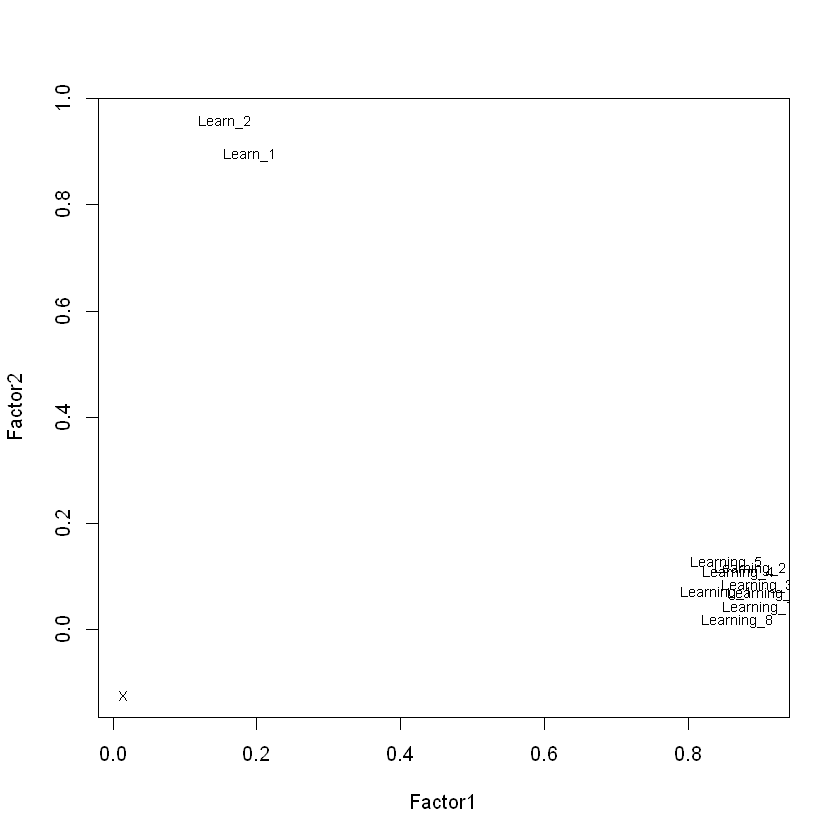

In [37]:
fit <- factanal(factor_df, 2)
print(fit, digits=2, cutoff=.3, sort=TRUE)
# plot factor 1 by factor 2
load <- fit$loadings[,1:2]
plot(load,type="n") # set up plot
text(load,labels=names(factor_df),cex=.7) # add variable names

# Begin Mediation Analysis

In [7]:
head(df)

X,turnover_mean,inclusion_mean,learning_mean,micro_count
0,4,3.8750,2.6,14
1,0,1.8125,2.6,6
2,3,4.5000,4.2,14
3,3,4.0000,4.0,14
4,3,4.5000,3.6,14
5,1,4.0000,3.6,14


In [8]:
#Baron and Kenny Method.
#First, regress inclusion on learning to obtain a path.
apath<-lm(inclusion_mean ~ learning_mean, data = df)
summary(apath)


Call:
lm(formula = inclusion_mean ~ learning_mean, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9799 -0.5294  0.1264  0.5922  1.6795 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.72572    0.15511  17.573  < 2e-16 ***
learning_mean  0.37028    0.05076   7.294 2.88e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8385 on 290 degrees of freedom
Multiple R-squared:  0.155,	Adjusted R-squared:  0.1521 
F-statistic:  53.2 on 1 and 290 DF,  p-value: 2.883e-12


In [9]:
#Next, obtain c path by regressing turnover on learning and inclusion

cpath<-lm(turnover_mean ~ learning_mean + inclusion_mean, data = df)
summary(cpath)  


Call:
lm(formula = turnover_mean ~ learning_mean + inclusion_mean, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.11497 -0.84138  0.09696  0.85503  3.01568 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.20033    0.29658  -4.047 6.66e-05 ***
learning_mean   0.03000    0.07348   0.408    0.683    
inclusion_mean  0.84386    0.07814  10.800  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.116 on 289 degrees of freedom
Multiple R-squared:   0.33,	Adjusted R-squared:  0.3254 
F-statistic: 71.17 on 2 and 289 DF,  p-value: < 2.2e-16


In [24]:
#Run Sobel test.
library(bda)
mediation.test(df$learning_mean, df$inclusion_mean, df$turnover_mean) #Order: med,IV,DV

,Sobel,Aroian,Goodman
z.value,0.4076449,0.4038788,0.4115184
p.value,0.6835344,0.6863019,0.6806925


In [23]:
# Conduct bootsrapping procedure to determine significance of indirect effect
# (apath * bpath).

library(MBESS)

mediation(df$learning_mean, df$inclusion_mean, df$turnover_mean, conf.level = 0.95, bootstrap = T, B = 5000, which.boot="Percentile")

[1] "Bootstrap resampling has begun. This process may take a considerable amount of time if the number of replications is large, which is optimal for the bootstrap procedure."


,Estimate,CI.Lower_Percentile,CI.Upper_Percentile
Indirect.Effect,0.31246007,0.22076708,0.41160188
Indirect.Effect.Partially.Standardized,0.23002496,0.16418466,0.30126525
Index.of.Mediation,0.22273171,0.15584904,0.29583826
R2_4.5,0.05920697,0.01203253,0.11799703
R2_4.6,0.04457520,0.02276646,0.07435383
R2_4.7,0.13507754,0.07641664,0.19703451
Ratio.of.Indirect.to.Total.Effect,0.91239496,0.60286172,1.57236127
Ratio.of.Indirect.to.Direct.Effect,10.41486842,-54.42266075,63.52444324
Success.of.Surrogate.Endpoint,0.92488190,0.56165013,1.27252642
Residual.Based_Gamma,0.07058266,0.03013600,0.12093267
